## Clustering

In [ ]:
!pip install pyspark

In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Clustering").getOrCreate()

In [2]:
data = spark.read.csv(path = "../data/seeds_dataset.csv",
                      header = True, inferSchema = True)

In [3]:
data.show()

+-----+---------+-----------+------------------+------------------+---------------------+------------------+
| area|perimeter|compactness|  length_of_kernel|   width_of_kernel|asymmetry_coefficient|  length_of_groove|
+-----+---------+-----------+------------------+------------------+---------------------+------------------+
|15.26|    14.84|      0.871|             5.763|             3.312|                2.221|              5.22|
|14.88|    14.57|     0.8811| 5.553999999999999|             3.333|                1.018|             4.956|
|14.29|    14.09|      0.905|             5.291|3.3369999999999997|                2.699|             4.825|
|13.84|    13.94|     0.8955|             5.324|3.3789999999999996|                2.259|             4.805|
|16.14|    14.99|     0.9034|5.6579999999999995|             3.562|                1.355|             5.175|
|14.38|    14.21|     0.8951|             5.386|             3.312|   2.4619999999999997|             4.956|
|14.69|    14.49|  

In [4]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols = data.columns,
                            outputCol = "features")

data = assembler.transform(data)

In [5]:
data.toPandas()

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_groove,features
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,"[15.26, 14.84, 0.871, 5.763, 3.312, 2.221, 5.22]"
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,"[14.88, 14.57, 0.8811, 5.553999999999999, 3.33..."
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,"[14.29, 14.09, 0.905, 5.291, 3.336999999999999..."
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,"[13.84, 13.94, 0.8955, 5.324, 3.37899999999999..."
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,"[16.14, 14.99, 0.9034, 5.6579999999999995, 3.5..."
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,"[12.19, 13.2, 0.8783, 5.1370000000000005, 2.98..."
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,"[11.23, 12.88, 0.8511, 5.14, 2.795, 4.325, 5.003]"
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,"[13.2, 13.66, 0.8883, 5.236000000000001, 3.231..."
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,"[11.84, 13.21, 0.8521, 5.175, 2.83600000000000..."


## StandardScaler
_**Documentación:** https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.feature.StandardScaler.html_

In [6]:
from pyspark.ml.feature import StandardScaler

scaler = StandardScaler(inputCol = "features",
                        outputCol = "scaled_features",
                        withStd = True,
                        withMean = False)

data = scaler.fit(data).transform(data)

data.toPandas()

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_groove,features,scaled_features
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,"[15.26, 14.84, 0.871, 5.763, 3.312, 2.221, 5.22]","[5.244527953320284, 11.363299389287777, 36.860..."
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,"[14.88, 14.57, 0.8811, 5.553999999999999, 3.33...","[5.113930271651758, 11.156554723849252, 37.288..."
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,"[14.29, 14.09, 0.905, 5.291, 3.336999999999999...","[4.911160186955888, 10.789008651958541, 38.299..."
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,"[13.84, 13.94, 0.8955, 5.324, 3.37899999999999...","[4.756505037611581, 10.674150504492696, 37.897..."
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,"[16.14, 14.99, 0.9034, 5.6579999999999995, 3.5...","[5.546964689815818, 11.478157536753622, 38.232..."
...,...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,"[12.19, 13.2, 0.8783, 5.1370000000000005, 2.98...","[4.189436156682454, 10.107516976994518, 37.169..."
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,"[11.23, 12.88, 0.8511, 5.14, 2.795, 4.325, 5.003]","[3.8595051714145994, 9.862486262400711, 36.018..."
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,"[13.2, 13.66, 0.8883, 5.236000000000001, 3.231...","[4.536551047433011, 10.459748629223116, 37.592..."
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,"[11.84, 13.21, 0.8521, 5.175, 2.83600000000000...","[4.069148818303549, 10.115174186825575, 36.060..."


In [7]:
data.select("scaled_features").show(truncate = False)

+-----------------------------------------------------------------------------------------------------------------------------------+
|scaled_features                                                                                                                    |
+-----------------------------------------------------------------------------------------------------------------------------------+
|[5.244527953320284,11.363299389287777,36.860833906302894,13.007165541092315,8.76852883087142,1.4771618831975104,10.62097073949694] |
|[5.113930271651758,11.156554723849252,37.28826722714521,12.53544983779745,8.824126386864265,0.6770602418257837,10.08381819634997]  |
|[4.911160186955888,10.789008651958541,38.29971835270278,11.94185543604363,8.834716397529569,1.7950742560783792,9.817276593500525]  |
|[4.756505037611581,10.674150504492696,37.89767711032634,12.01633686287966,8.945911509515255,1.5024352517528932,9.776583219019694]  |
|[5.546964689815818,11.478157536753622,38.23200614346043,12.77

## K-Means

_**Documentación:** https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.clustering.KMeans.html_

In [8]:
from pyspark.ml.clustering import KMeans

In [9]:
kmeans = KMeans(featuresCol = "scaled_features",
                predictionCol = "cluster", 
                k = 3,
                distanceMeasure = "euclidean")

model = kmeans.fit(data)

In [10]:
cluster = model.transform(data)

cluster.show()

+-----+---------+-----------+------------------+------------------+---------------------+------------------+--------------------+--------------------+-------+
| area|perimeter|compactness|  length_of_kernel|   width_of_kernel|asymmetry_coefficient|  length_of_groove|            features|     scaled_features|cluster|
+-----+---------+-----------+------------------+------------------+---------------------+------------------+--------------------+--------------------+-------+
|15.26|    14.84|      0.871|             5.763|             3.312|                2.221|              5.22|[15.26,14.84,0.87...|[5.24452795332028...|      1|
|14.88|    14.57|     0.8811| 5.553999999999999|             3.333|                1.018|             4.956|[14.88,14.57,0.88...|[5.11393027165175...|      1|
|14.29|    14.09|      0.905|             5.291|3.3369999999999997|                2.699|             4.825|[14.29,14.09,0.90...|[4.91116018695588...|      1|
|13.84|    13.94|     0.8955|             5.32

In [11]:
cluster.toPandas()

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_groove,features,scaled_features,cluster
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,"[15.26, 14.84, 0.871, 5.763, 3.312, 2.221, 5.22]","[5.244527953320284, 11.363299389287777, 36.860...",1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,"[14.88, 14.57, 0.8811, 5.553999999999999, 3.33...","[5.113930271651758, 11.156554723849252, 37.288...",1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,"[14.29, 14.09, 0.905, 5.291, 3.336999999999999...","[4.911160186955888, 10.789008651958541, 38.299...",1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,"[13.84, 13.94, 0.8955, 5.324, 3.37899999999999...","[4.756505037611581, 10.674150504492696, 37.897...",1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,"[16.14, 14.99, 0.9034, 5.6579999999999995, 3.5...","[5.546964689815818, 11.478157536753622, 38.232...",1
...,...,...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,"[12.19, 13.2, 0.8783, 5.1370000000000005, 2.98...","[4.189436156682454, 10.107516976994518, 37.169...",0
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,"[11.23, 12.88, 0.8511, 5.14, 2.795, 4.325, 5.003]","[3.8595051714145994, 9.862486262400711, 36.018...",0
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,"[13.2, 13.66, 0.8883, 5.236000000000001, 3.231...","[4.536551047433011, 10.459748629223116, 37.592...",0
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,"[11.84, 13.21, 0.8521, 5.175, 2.83600000000000...","[4.069148818303549, 10.115174186825575, 36.060...",0


In [12]:
centers = model.clusterCenters()
centers

[array([ 4.07497225, 10.14410142, 35.89816849, 11.80812742,  7.54416916,
         3.15410901, 10.38031464]),
 array([ 4.96198582, 10.97871333, 37.30930808, 12.44647267,  8.62880781,
         1.80061978, 10.41913733]),
 array([ 6.35645488, 12.40730852, 37.41990178, 13.93860446,  9.7892399 ,
         2.41585013, 12.29286107])]

In [13]:
summary = model.summary

# Inercia: Suma de las distancias al cuadrado de todos los puntos con su centroide mas cercano
summary.trainingCost

428.6082011872446

### Ejercicio:
- Hacer el codigo para el método del codo para **KMeans** en PySpark.

In [36]:
inercias_km = []

for n in range(2,11):
    kmeans = KMeans(featuresCol = "scaled_features",
                predictionCol = "cluster", 
                k = n,
                distanceMeasure = "euclidean")
    model = kmeans.fit(data)
    
    summary = model.summary
    
    inercias_km.append(summary.trainingCost)

In [37]:
import matplotlib.pyplot as plt

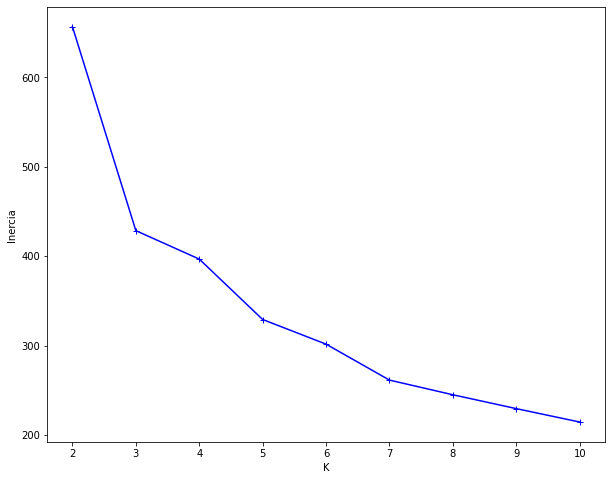

In [38]:
plt.figure(figsize=(10,8))
plt.plot(range(2,11), inercias_km, marker = '+', color='blue')
plt.xlabel('K')
plt.ylabel('Inercia')
plt.show();

## Bisecting K-Means

**Bisecting K-means** es una variante de **K-Means** que busca dividir el conjunto de datos en clusters de manera jerárquica, en lugar de buscar una partición óptima de los datos. 

**Bisecting K-Means** se puede resumir en los siguientes pasos:

1. Inicializar el algoritmo con un cluster que contenga todos los datos.

2. Mientras no se hayan alcanzado el número de clusters deseados:

    - Seleccionar el cluster más grande y dividirlo en dos sub-clusters utilizando el algoritmo **K-Means** con **k = 2**.

    - Seleccionar el sub-cluster que tenga la mayor suma de cuadrados de las distancias de cada punto al centroide del sub-cluster (Inercia) y repetir el paso 2 hasta alcanzar el número deseado de clusters.

**Bisecting K-Means** tiene la ventaja de ser más resistente a la inicialización aleatoria de los centroides, ya que cada división del cluster seleccionado se realiza utilizando el algoritmo **K-Means**, que tiene su propia inicialización aleatoria. Además, el algoritmo de **Bisecting K-Means** puede ser más eficiente que el algoritmo **K-Means** en conjuntos de datos con muchos puntos y/o muchas dimensiones, ya que divide el conjunto de datos en subconjuntos más pequeños antes de aplicar el algoritmo **K-Means**.

_**Documentación**: https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.clustering.BisectingKMeans.html_

In [23]:
from pyspark.ml.clustering import BisectingKMeans

bkmeans = BisectingKMeans(featuresCol    = "scaled_features",
                         predictionCol   = "cluster", 
                         k               = 3,
                         distanceMeasure = "euclidean")

model = bkmeans.fit(data)

In [24]:
cluster = model.transform(data)

cluster.show()

+-----+---------+-----------+------------------+------------------+---------------------+------------------+--------------------+--------------------+-------+
| area|perimeter|compactness|  length_of_kernel|   width_of_kernel|asymmetry_coefficient|  length_of_groove|            features|     scaled_features|cluster|
+-----+---------+-----------+------------------+------------------+---------------------+------------------+--------------------+--------------------+-------+
|15.26|    14.84|      0.871|             5.763|             3.312|                2.221|              5.22|[15.26,14.84,0.87...|[5.24452795332028...|      1|
|14.88|    14.57|     0.8811| 5.553999999999999|             3.333|                1.018|             4.956|[14.88,14.57,0.88...|[5.11393027165175...|      1|
|14.29|    14.09|      0.905|             5.291|3.3369999999999997|                2.699|             4.825|[14.29,14.09,0.90...|[4.91116018695588...|      1|
|13.84|    13.94|     0.8955|             5.32

In [25]:
centers = model.clusterCenters()
centers

[array([ 4.05829295, 10.14045513, 35.77528896, 11.82997208,  7.4942816 ,
         3.30390703, 10.44460049]),
 array([ 4.79106924, 10.79579075, 37.2409896 , 12.25138864,  8.47628236,
         1.86310332, 10.24519649]),
 array([ 6.2407035 , 12.29350122, 37.40324608, 13.82968554,  9.69123508,
         2.31478489, 12.15051313])]

In [26]:
summary = model.summary

# Inercia: Suma de las distancias al cuadrado de todos los puntos con su centroide mas cercano
summary.trainingCost

444.7408243484242

### Ejercicio:
- Hacer el codigo para el método del codo para **Bisecting K-Means** en PySpark.

In [32]:
def inercias(data, k=11):
    inercias = list()

    for n in range(2, k):  # Comenzar desde k=2
        bkmeans = BisectingKMeans(
                         featuresCol    = "scaled_features",
                         predictionCol   = "cluster", 
                         k               = n,
                         distanceMeasure = "euclidean"
        )

        model = bkmeans.fit(data)
        
        # Obtener el costo (inercia) del modelo
        inercia = model.summary.trainingCost
        inercias.append(inercia)

    plt.figure(figsize=(10, 8))
    plt.plot(range(2, len(inercias) + 2), inercias, marker="x", color="blue")  # Ajustar el rango del eje x
    plt.xlabel("K's")
    plt.ylabel("Inercia")
    plt.show()
    
    return inercias

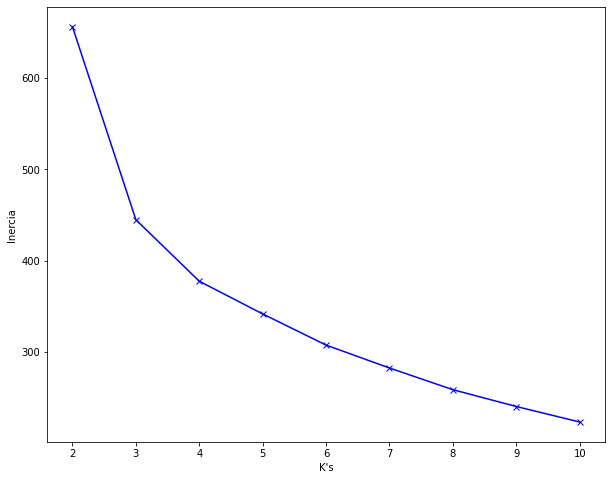

In [33]:
inercias_bk = inercias(data)

### Comparación

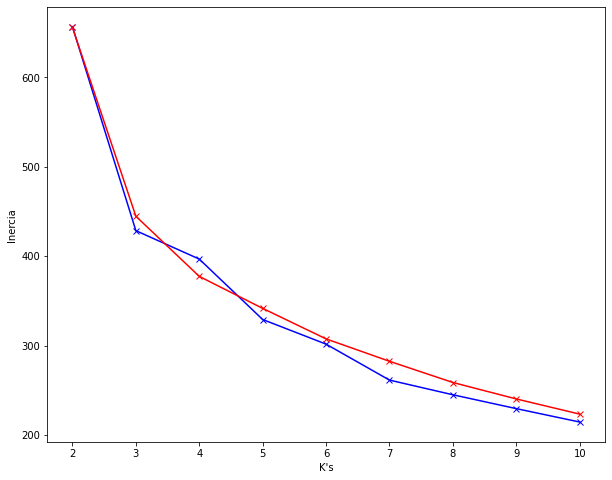

In [40]:
plt.figure(figsize=(10, 8))
plt.plot(range(2, 11), inercias_km, marker="x", color="blue")
plt.plot(range(2, 11), inercias_bk, marker="x", color="red")  # Ajustar el rango del eje x
plt.xlabel("K's")
plt.ylabel("Inercia")
plt.show()

In [ ]:
################################################################################################################################